<a href="https://colab.research.google.com/github/mikewig/EDA-Group/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis en el ambito de la ciberseguridad
## Cybersecurity 🪪 Intrusion 🦠 Detection Dataset
Este conjunto de datos de detección de intrusiones de ciberseguridad está diseñado para detectar ciberintrusiones basándose en el tráfico de red y el comportamiento del usuario. A continuación, explicaré cada aspecto en detalle, incluyendo la estructura del conjunto de datos, la importancia de las características, los posibles enfoques de análisis y cómo se puede utilizar para el aprendizaje automático.

[Data set](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset/data)

Proyecto inicial análisis EDA  Michael López
Colaboradores:


* Polina Pavlova
* Stephany Lizarraga  
* Andrea Alonso
* Juan Carlos Macías

Abril del 2025



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
!pip install ydata-profiling
from ydata_profiling import ProfileReport
import numpy as np

In [31]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [32]:
df = pd.read_csv("cybersecurity.csv")
df.head()

session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0                0  
2       Chrome                    0                1  
3      Unknown                    0                1  
4      Firefox                    0                0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [34]:
df.describe()

network_packet_size  login_attempts  session_duration  \
count          9537.000000     9537.000000       9537.000000   
mean            500.430639        4.032086        792.745312   
std             198.379364        1.963012        786.560144   
min              64.000000        1.000000          0.500000   
25%             365.000000        3.000000        231.953006   
50%             499.000000        4.000000        556.277457   
75%             635.000000        5.000000       1105.380602   
max            1285.000000       13.000000       7190.392213   

       ip_reputation_score  failed_logins  unusual_time_access  \
count          9537.000000    9537.000000          9537.000000   
mean              0.331338       1.517773             0.149942   
std               0.177175       1.033988             0.357034   
min               0.002497       0.000000             0.000000   
25%               0.191946       1.000000             0.000000   
50%               0.314778       1.000000             0.000000   
75%               0.453388       2.000000             0.000000   
max               0.924299       5.000000             1.000000   

       attack_detected  
count      9537.000000  
mean          0.447101  
std           0.497220  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

In [35]:
print(df.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


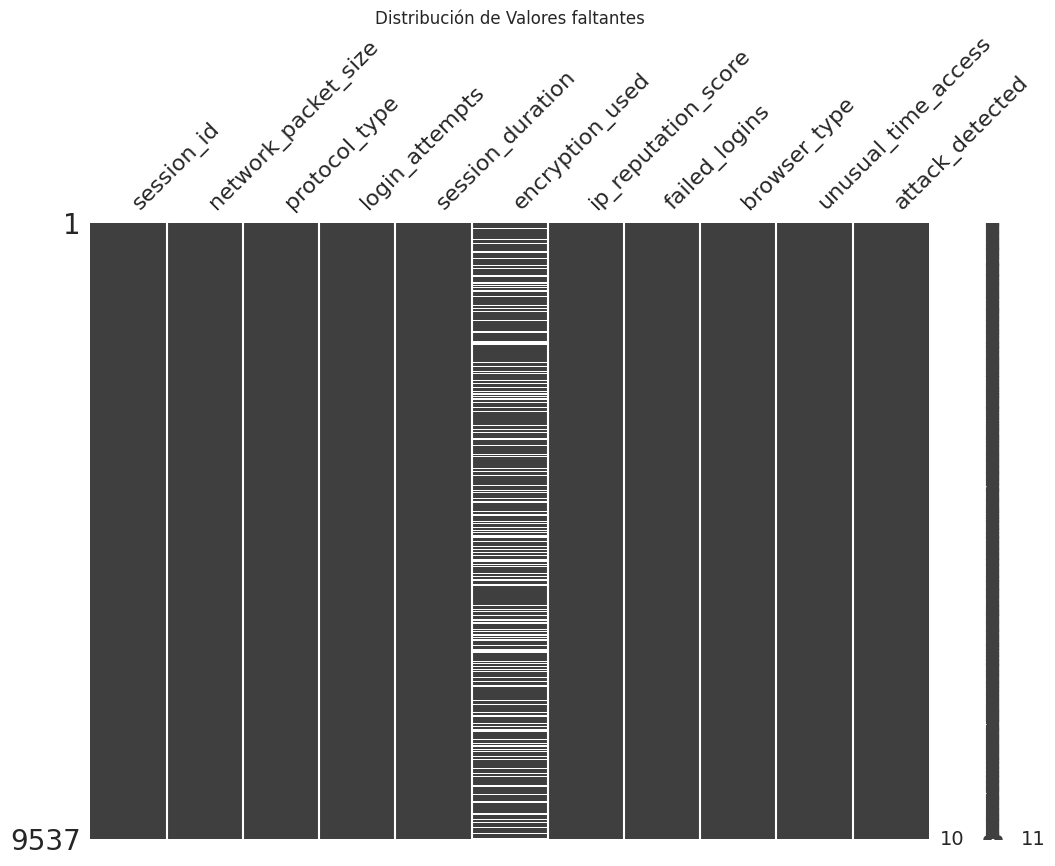

In [36]:
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores faltantes')
plt.show()

In [37]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

session_id              0.000000
network_packet_size     0.000000
protocol_type           0.000000
login_attempts          0.000000
session_duration        0.000000
encryption_used        20.614449
ip_reputation_score     0.000000
failed_logins           0.000000
browser_type            0.000000
unusual_time_access     0.000000
attack_detected         0.000000
dtype: float64

In [38]:
valores_unicos_columna = df['encryption_used'].unique()
valores_unicos_columna

array(['DES', 'AES', nan], dtype=object)

In [39]:
df2 = df.copy()

In [40]:
df2['encryption_used'] = df2['encryption_used'].fillna('None')

In [41]:
df2 = df2.drop(columns=['session_id'])

In [42]:
df2 = pd.get_dummies(df2, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

In [43]:
df2.sample()

network_packet_size  login_attempts  session_duration  \
4225                  603               5        748.175707   

      ip_reputation_score  failed_logins  unusual_time_access  \
4225              0.71306              1                    0   

      attack_detected  protocol_type_TCP  protocol_type_UDP  \
4225                1              False               True   

      encryption_used_DES  encryption_used_None  browser_type_Edge  \
4225                False                 False              False   

      browser_type_Firefox  browser_type_Safari  browser_type_Unknown  
4225                 False                False                 False

In [44]:
from sklearn.preprocessing import StandardScaler # transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que ayuda a que las características (o variables) estén en la misma escala
scaler = StandardScaler()
numerical_columns = ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins']
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])# fit solo calcula la media y la desviacion tipica, el transform hace toda la formula (lo transforma a 0 y 1)

In [45]:
df2.sample()

network_packet_size  login_attempts  session_duration  \
8440            -0.808749        0.493102          2.785643   

      ip_reputation_score  failed_logins  unusual_time_access  \
8440            -0.409058      -0.500779                    1   

      attack_detected  protocol_type_TCP  protocol_type_UDP  \
8440                1              False               True   

      encryption_used_DES  encryption_used_None  browser_type_Edge  \
8440                False                 False              False   

      browser_type_Firefox  browser_type_Safari  browser_type_Unknown  
8440                  True                False                 False

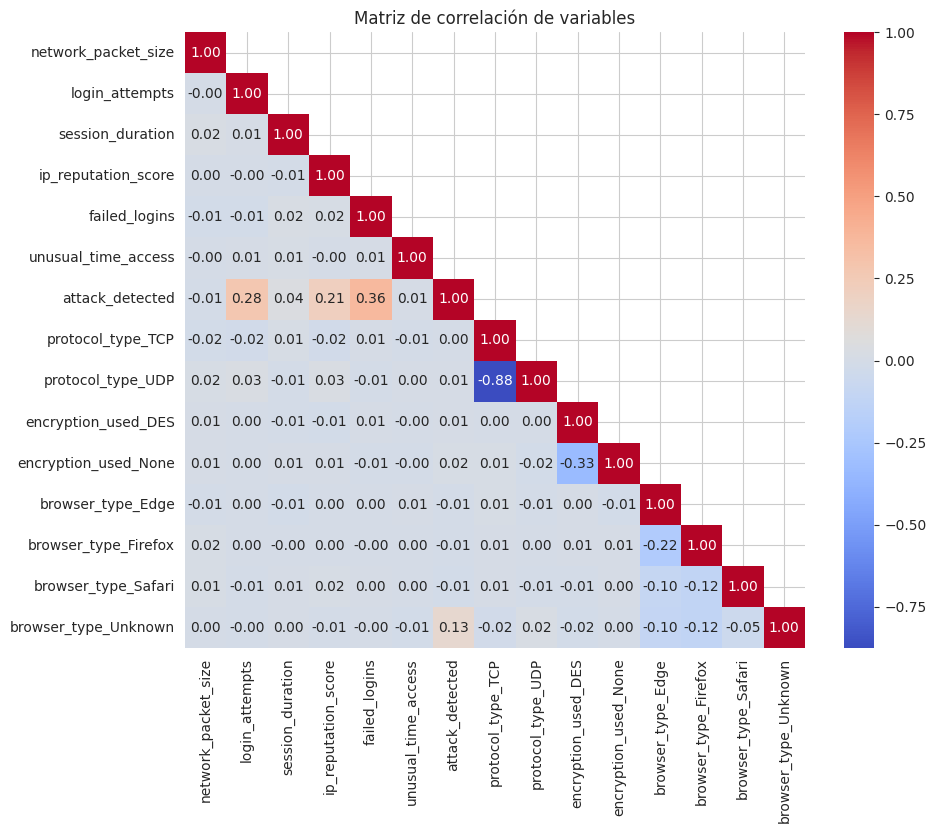

In [46]:
matrix = df2.corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
sns.heatmap(matrix, cmap="coolwarm", mask=mask, annot=True, fmt=".2f", cbar=True)
plt.title('Matriz de correlación de variables')
plt.show()

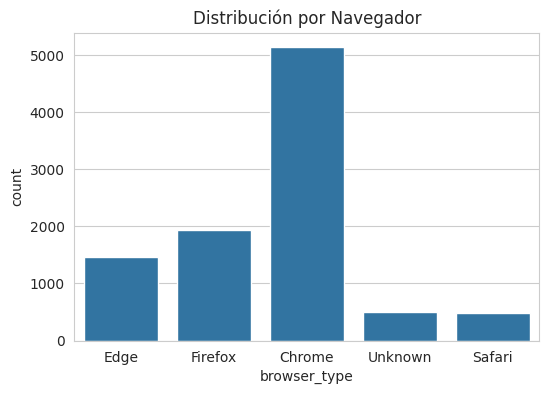

In [47]:
sns.countplot(x="browser_type", data=df)
plt.title("Distribución por Navegador")
plt.show()

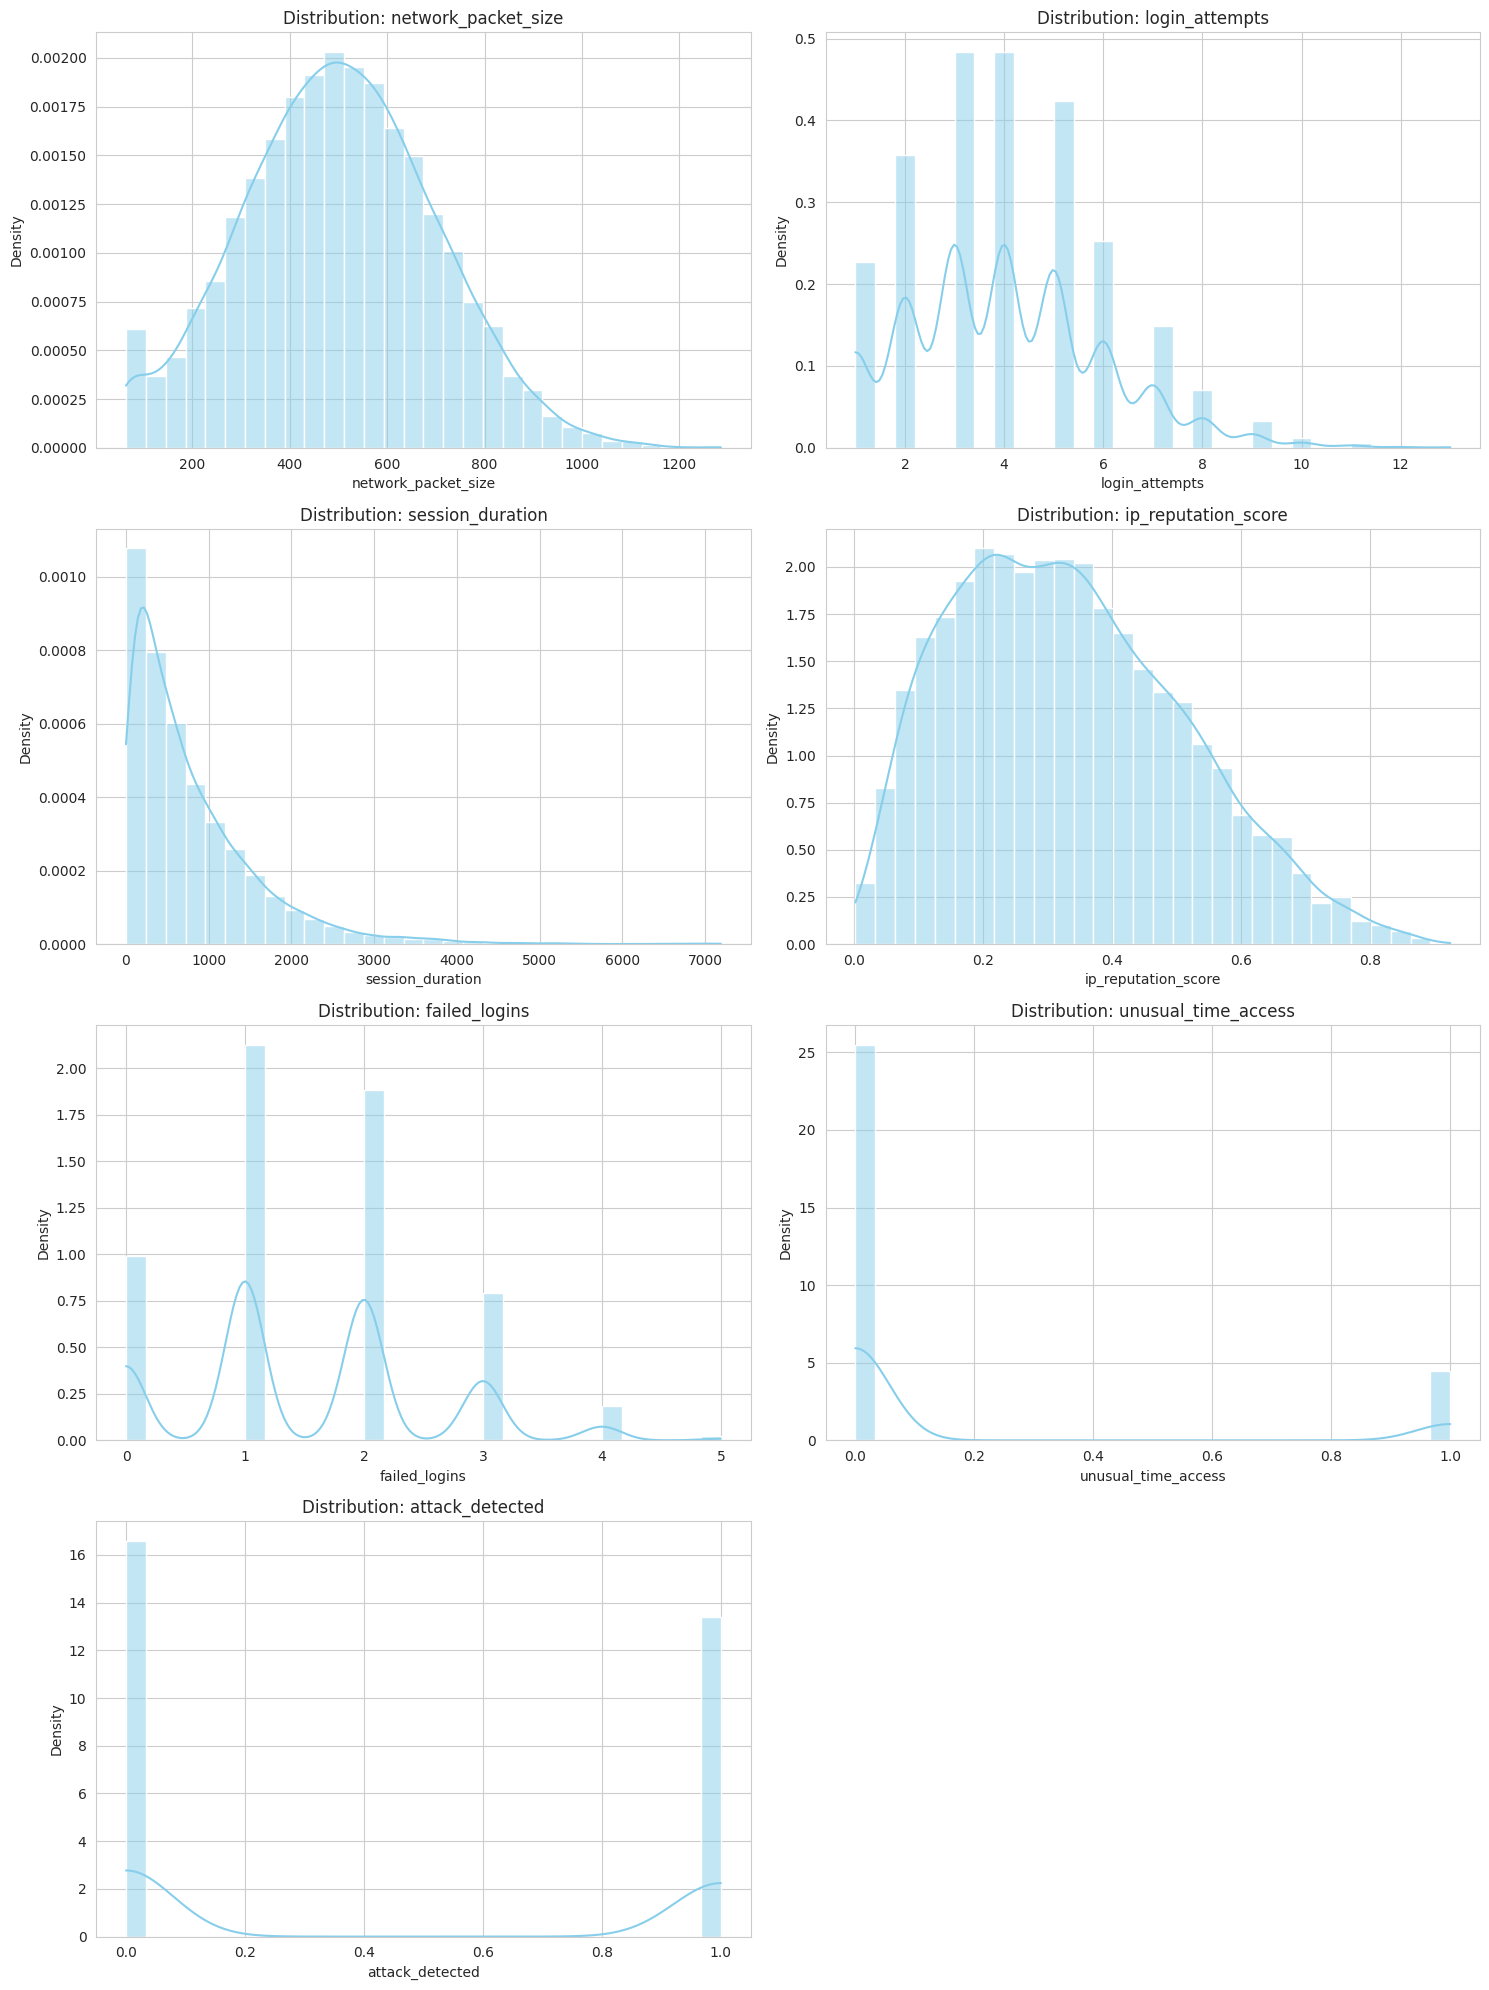

In [48]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

<ipython-input-17-6f111d6b315b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_detected",data=df,palette="Blues")


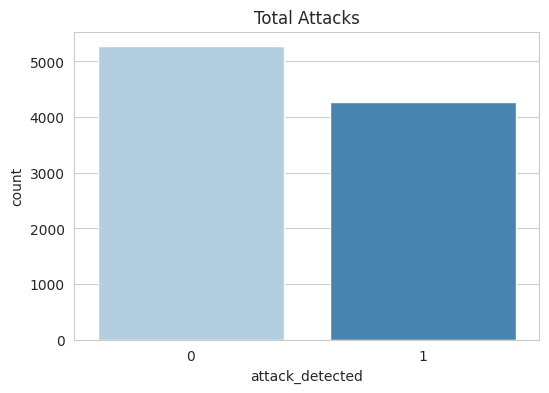

In [17]:
sns.countplot(x="attack_detected",data=df,palette="Blues")
plt.title("Total Attacks")
plt.show()

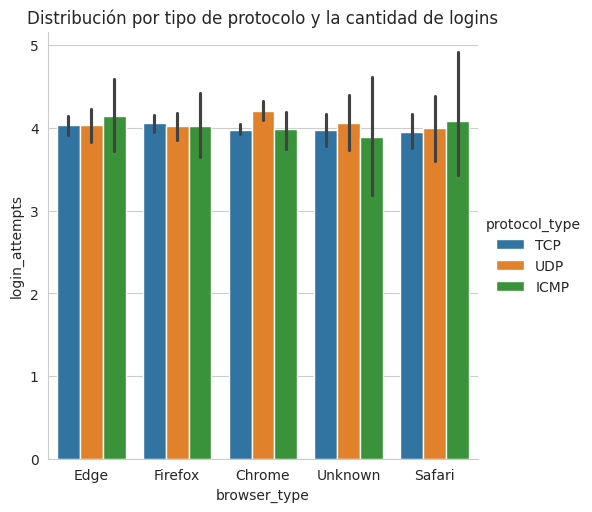

In [18]:
sns.catplot(x="browser_type", y="login_attempts", hue="protocol_type", kind="bar", data=df)
plt.title("Distribución por tipo de protocolo y la cantidad de logins")
plt.show()

In [19]:
from scipy import stats
# Lista de navegadores
navegadores = ["Edge", "Firefox", "Chrome", "Unknown", "Safari"]
df = df[df['browser_type'].isin(navegadores)]
# Separar datos por navegador
relevant_column = 'login_attempts'
edge = df[df['browser_type'] == "Edge"][relevant_column]
firefox = df[df['browser_type'] == "Firefox"][relevant_column]
chrome = df[df['browser_type'] == "Chrome"][relevant_column]
unknown = df[df['browser_type'] == "Unknown"][relevant_column]
safari = df[df['browser_type'] == "Safari"][relevant_column]


# analizar ANOVA test
# https://www.datacamp.com/es/tutorial/anova-test
f_statistic, p_value = stats.f_oneway(edge, firefox, chrome, unknown, safari)

# Mostrar los resultados
print("ANOVA Test - Comparación entre navegadores")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.3f}")

# Interpretación 5%, basado en los resultados significativos de un porcentaje de 0.05 (5%)
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa entre al menos dos navegadores.")
else:
    print("No hay diferencias significativas entre los navegadores.")

ANOVA Test - Comparación entre navegadores
F-Statistic: 0.18
P-Value: 0.951
No hay diferencias significativas entre los navegadores.


# Evaluación de los tipos de protocolos para el tipo de ataques.
🍀 Usar inicialmente stats para evaluar los tres protocolos
En este caso nos sale por debajo del 5% y por ello hay una deferencia significativa, un protocolo es menos usado.

🍀 Para reevaluar usaré prueba de Tukey HSD (Honest Significant Difference). Se utiliza para hacer comparaciones múltiples entre grupos después de una prueba ANOVA, identificando qué pares de grupos tienen diferencias estadísticamente significativas.

Conclusiones:

1️⃣ No hay diferencias significativas entre ICMP y TCP (p-adj = 0.9948, reject = False).

2️⃣ No hay diferencias significativas entre ICMP y UDP (p-adj = 0.4704, reject = False).

3️⃣ Sí hay una diferencia significativa entre TCP y UDP (p-adj = 0.0258, reject = True).



ANOVA Test - Comparación entre protocolos
F-Statistic: 3.40
P-Value: 0.034
Existe una diferencia estadísticamente significativa entre al menos dos navegadores.
Tamaño de cada grupo:
TCP: 6624, UDP: 2406, ICMP: 507

Resumen estadístico:
                count      mean       std  min  25%  50%  75%   max
protocol_type                                                      
ICMP            507.0  4.009862  1.958538  1.0  3.0  4.0  5.0  13.0
TCP            6624.0  4.001057  1.961389  1.0  3.0  4.0  5.0  13.0
UDP            2406.0  4.122195  1.966463  1.0  3.0  4.0  5.0  13.0


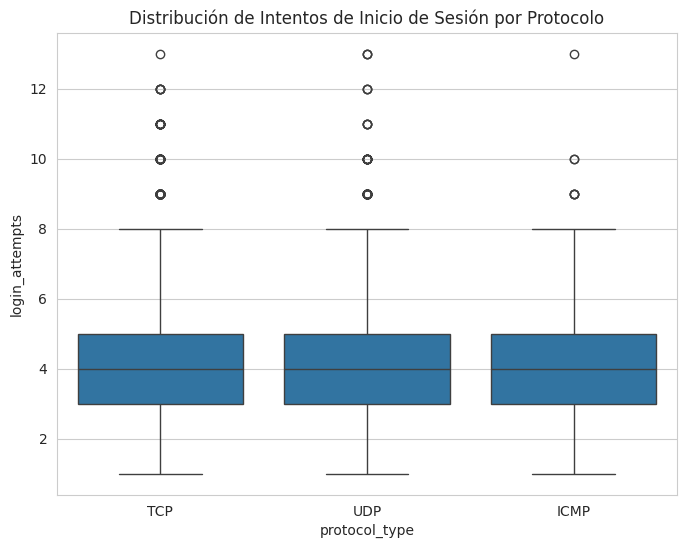


Resumen estadístico:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ICMP    TCP  -0.0088 0.9948 -0.2208 0.2032  False
  ICMP    UDP   0.1123 0.4704 -0.1125 0.3371  False
   TCP    UDP   0.1211 0.0258  0.0116 0.2306   True
---------------------------------------------------


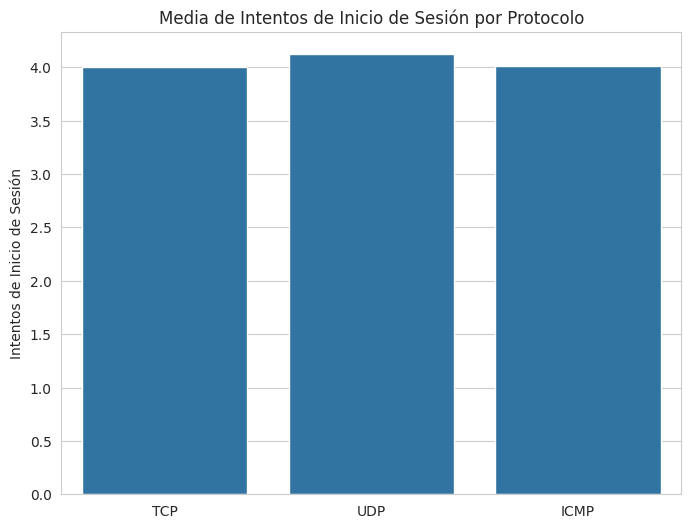

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista de protocolos
protocolos = ["TCP", "UDP", "ICMP"]
df = df[df['protocol_type'].isin(protocolos)]
# Separar datos por protocolos
relevant_column = 'login_attempts'
tcp = df[df['protocol_type'] == "TCP"][relevant_column]
udp = df[df['protocol_type'] == "UDP"][relevant_column]
icmp = df[df['protocol_type'] == "ICMP"][relevant_column]

f_statistic, p_value = stats.f_oneway(tcp, udp, icmp)

# Mostrar los resultados
print("ANOVA Test - Comparación entre protocolos")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.3f}")

# Interpretación 5%, basado en los resultados significativos de un porcentaje de 0.05 (5%)
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa entre al menos dos navegadores.")
    print("Tamaño de cada grupo:")
    print(f"TCP: {len(tcp)}, UDP: {len(udp)}, ICMP: {len(icmp)}")

    print("\nResumen estadístico:")
    print(df.groupby('protocol_type')[relevant_column].describe())
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df["protocol_type"], y=df[relevant_column])
    plt.title("Distribución de Intentos de Inicio de Sesión por Protocolo")
    plt.show()
else:
    print("No hay diferencias significativas entre los navegadores.")





print("\nResumen estadístico:")
# Crear una lista combinada con los valores y sus etiquetas de protocolo
all_data = list(tcp) + list(udp) + list(icmp)
labels = (["TCP"] * len(tcp)) + (["UDP"] * len(udp)) + (["ICMP"] * len(icmp))

# Prueba de Tukey
tukey_results = pairwise_tukeyhsd(endog=all_data, groups=labels, alpha=0.05)
print(tukey_results)
plt.figure(figsize=(8, 6))
sns.barplot(x=["TCP", "UDP", "ICMP"], y=[tcp.mean(), udp.mean(), icmp.mean()])
plt.title("Media de Intentos de Inicio de Sesión por Protocolo")
plt.ylabel("Intentos de Inicio de Sesión")
plt.show()

In [21]:
profile = ProfileReport(df, title="Reporte Inicial", explorative=True)
profile.to_file("output_initial.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 24.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
from IPython.display import HTML
HTML(filename='output_initial.html')

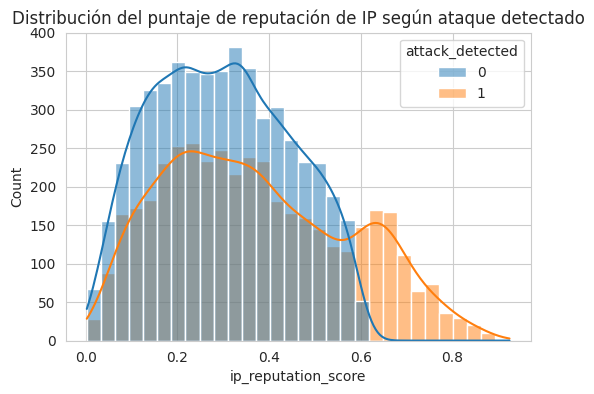

In [23]:
sns.histplot(data=df, x="ip_reputation_score", hue="attack_detected", kde=True, bins=30)
plt.title("Distribución del puntaje de reputación de IP según ataque detectado")
plt.show()

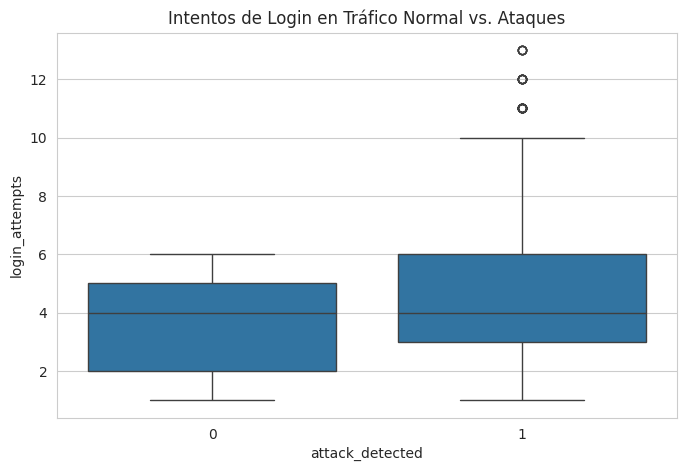

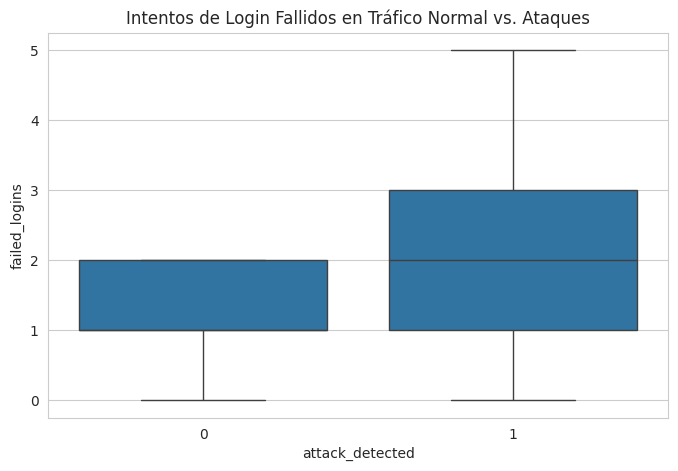

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="attack_detected", y="login_attempts", data=df)
plt.title("Intentos de Login en Tráfico Normal vs. Ataques")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="attack_detected", y="failed_logins", data=df)
plt.title("Intentos de Login Fallidos en Tráfico Normal vs. Ataques")
plt.show()

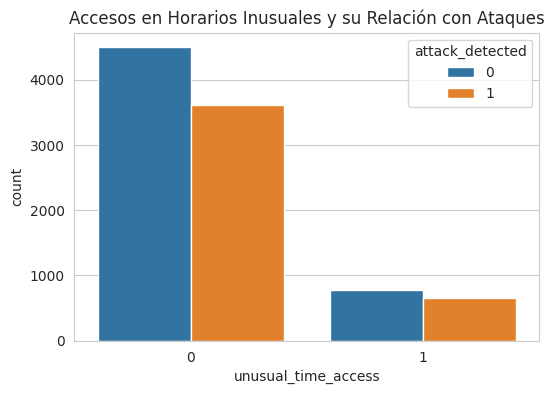

In [25]:
sns.countplot(x="unusual_time_access", hue="attack_detected", data=df)
plt.title("Accesos en Horarios Inusuales y su Relación con Ataques")
plt.show()

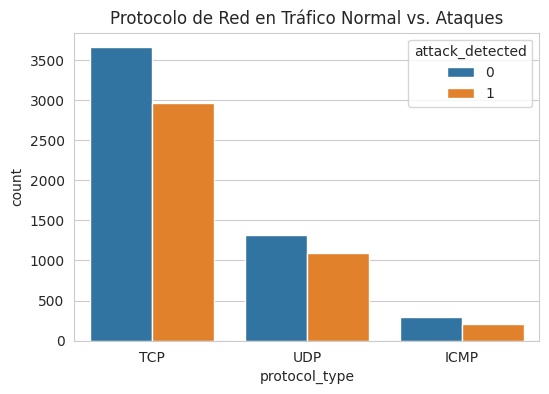

In [26]:
sns.countplot(x="protocol_type", hue="attack_detected", data=df)
plt.title("Protocolo de Red en Tráfico Normal vs. Ataques")
plt.show()

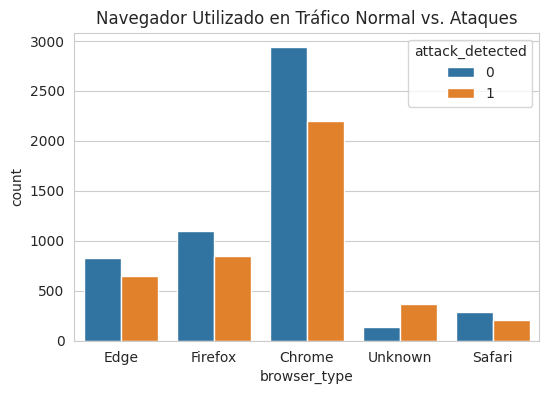

In [27]:
sns.countplot(x="browser_type", hue="attack_detected", data=df)
plt.title("Navegador Utilizado en Tráfico Normal vs. Ataques")
plt.show()

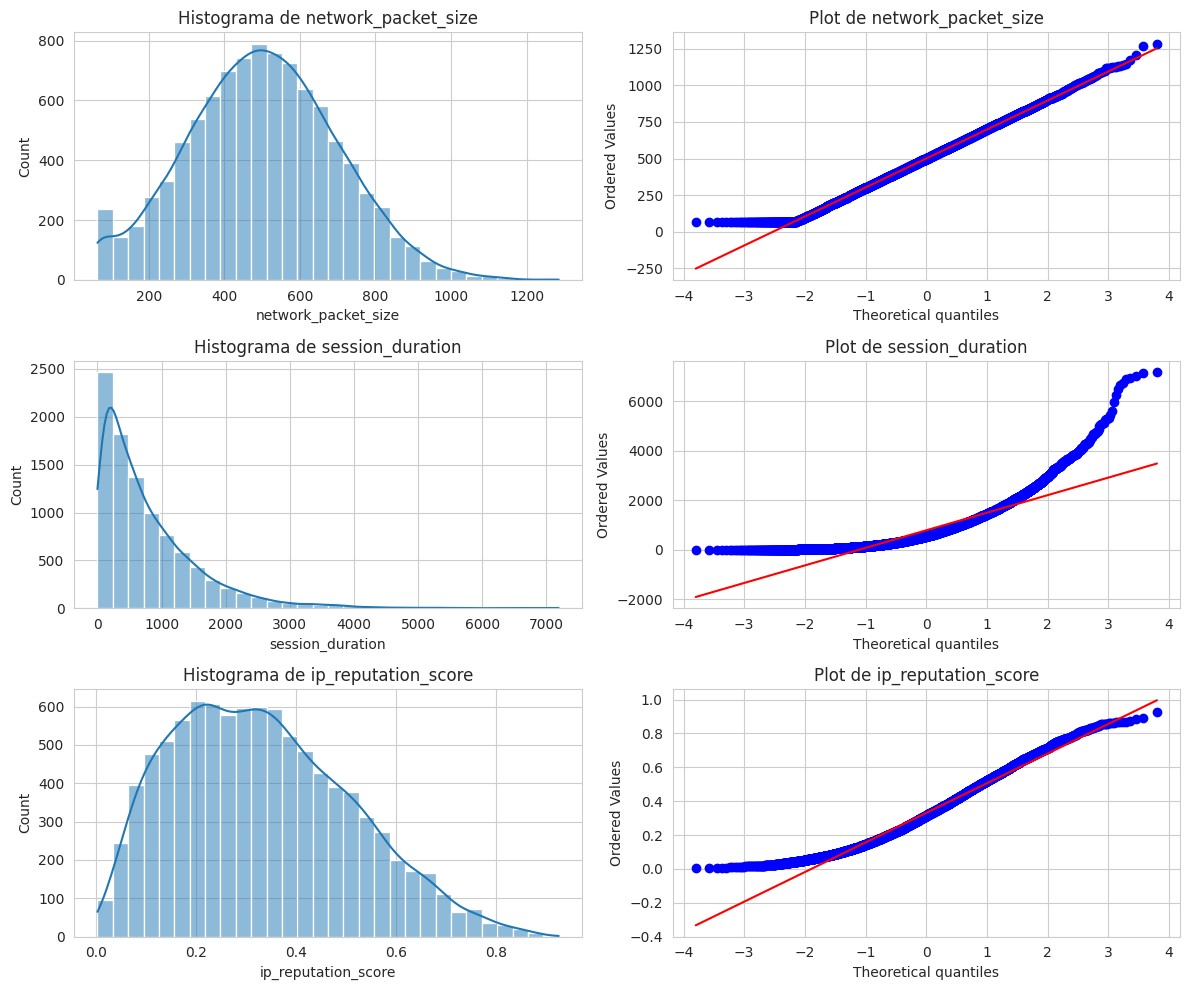

Kolmogorov-Smirnov p-value: 0.000
Los datos NO siguen una distribución normal.


In [28]:
numeric_cols = ["network_packet_size", "session_duration", "ip_reputation_score"]

sample_df = df[numeric_cols].sample(n=9500, random_state=42)

normality_results = {}
for col in numeric_cols:
    ks_stat, ks_p = stats.kstest(sample_df[col], 'norm', args=(sample_df[col].mean(), sample_df[col].std()))
    normality_results[col] = {
        "Kolmogorov-Smirnov value": ks_p
    }

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histograma de {col}")

    stats.probplot(df[col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"Plot de {col}")

plt.tight_layout()
plt.show()

print(f"Kolmogorov-Smirnov p-value: {ks_p:.3f}")

if ks_p < 0.05:
    print("Los datos NO siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

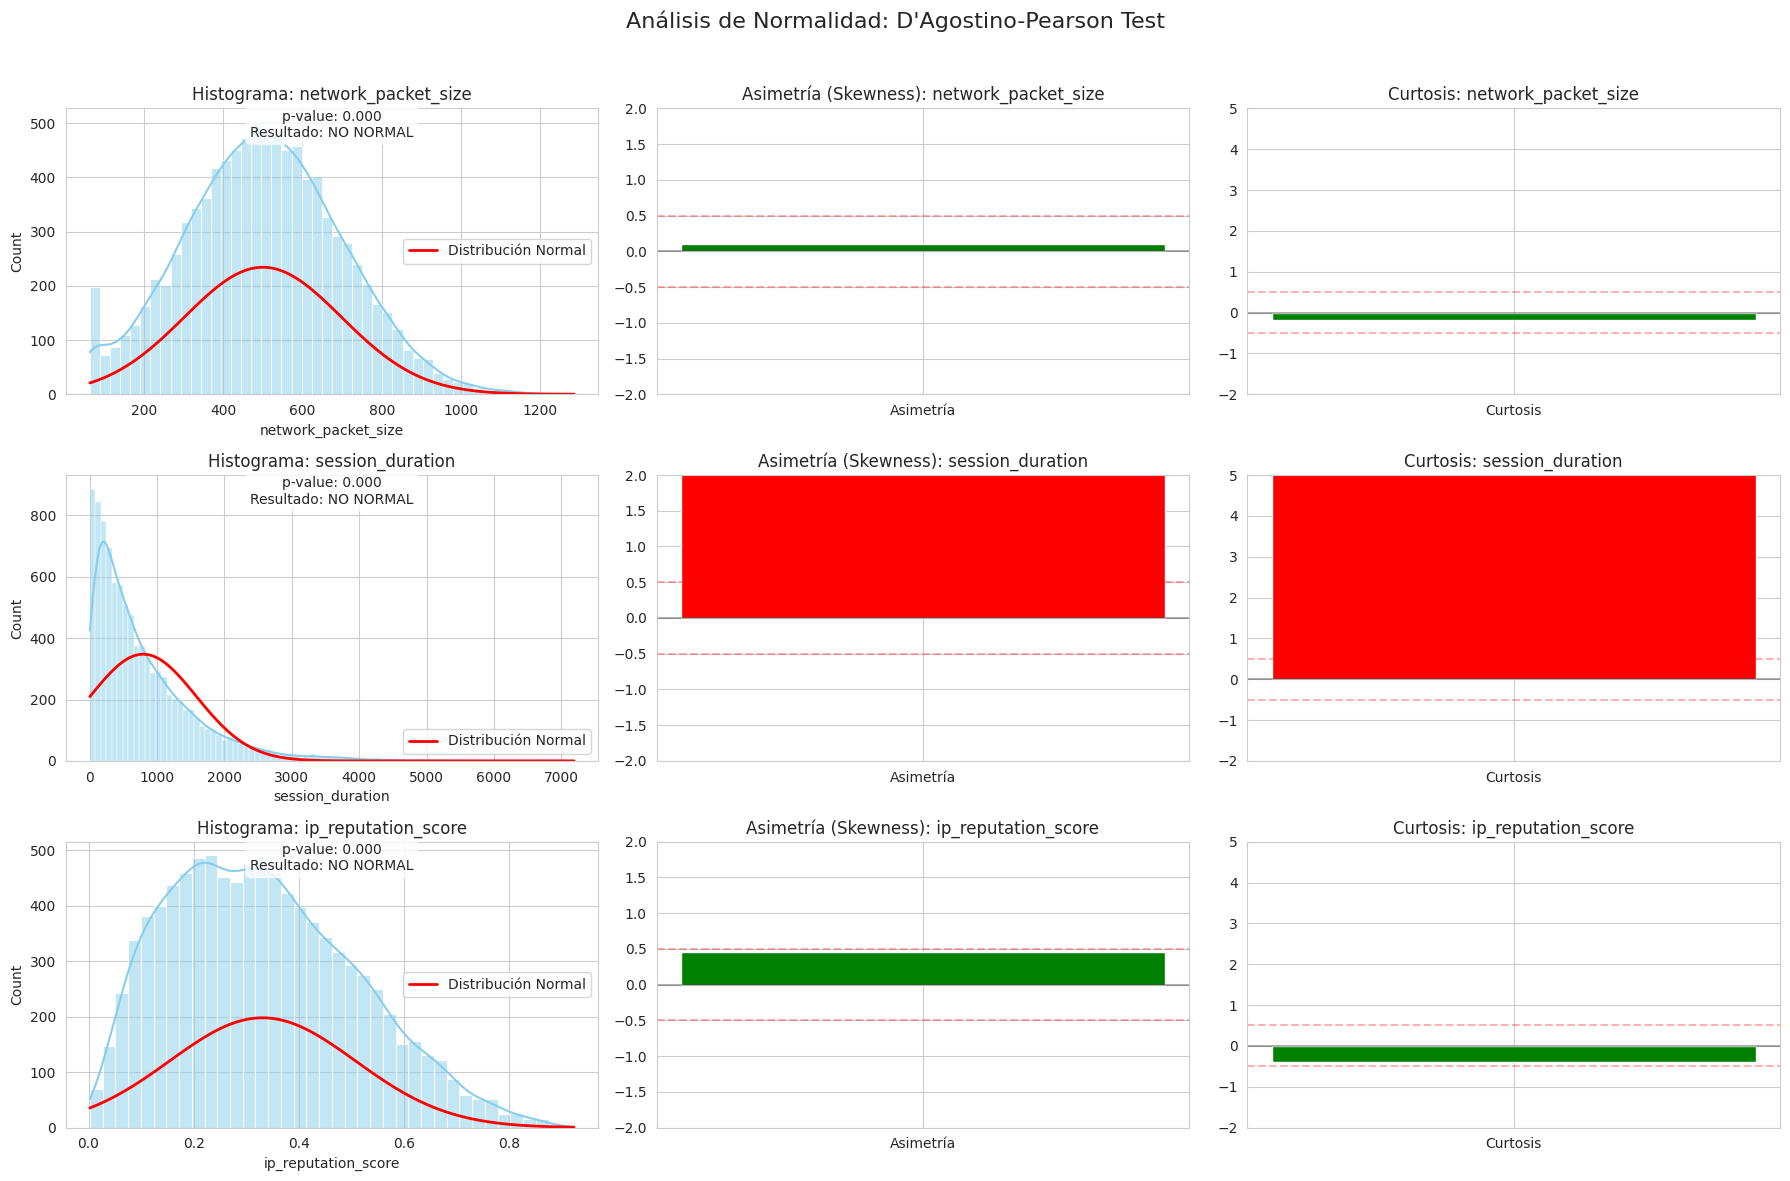


Resultados detallados del test D'Agostino-Pearson:
           Variable  Asimetría  Curtosis  Estadístico D'Agostino Valor p Resultado
network_packet_size      0.096    -0.181                  30.058   0.000 NO NORMAL
   session_duration      2.084     6.909                4278.313   0.000 NO NORMAL
ip_reputation_score      0.454    -0.399                 399.566   0.000 NO NORMAL


In [29]:
skewness_kurtosis = {}
numeric_cols = ["network_packet_size", "session_duration", "ip_reputation_score"]

for col in numeric_cols:
    skew = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    stat, p = stats.normaltest(df[col])

    skewness_kurtosis[col] = {
        "skewness": skew,
        "kurtosis": kurt,
        "test_statistic": stat,
        "p_value": p
    }

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Análisis de Normalidad: D'Agostino-Pearson Test", fontsize=16)

norm_threshold = 0.05

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')

    x = np.linspace(df[col].min(), df[col].max(), 100)
    y = stats.norm.pdf(x, df[col].mean(), df[col].std())
    axes[i, 0].plot(x, y * len(df[col]) * (df[col].max() - df[col].min()) / 100,
                   'r-', linewidth=2, label='Distribución Normal')
    axes[i, 0].set_title(f"Histograma: {col}")
    axes[i, 0].legend()

    skew_color = 'red' if abs(skewness_kurtosis[col]['skewness']) > 0.5 else 'green'
    axes[i, 1].bar(['Asimetría'], [skewness_kurtosis[col]['skewness']], color=skew_color)
    axes[i, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[i, 1].axhline(y=0.5, color='red', linestyle='--', alpha=0.3)
    axes[i, 1].axhline(y=-0.5, color='red', linestyle='--', alpha=0.3)
    axes[i, 1].set_title(f"Asimetría (Skewness): {col}")
    axes[i, 1].set_ylim(-2, 2)

    kurt_color = 'red' if abs(skewness_kurtosis[col]['kurtosis']) > 0.5 else 'green'
    axes[i, 2].bar(['Curtosis'], [skewness_kurtosis[col]['kurtosis']], color=kurt_color)
    axes[i, 2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[i, 2].axhline(y=0.5, color='red', linestyle='--', alpha=0.3)
    axes[i, 2].axhline(y=-0.5, color='red', linestyle='--', alpha=0.3)
    axes[i, 2].set_title(f"Curtosis: {col}")
    axes[i, 2].set_ylim(-2, 5)

    p_value = skewness_kurtosis[col]['p_value']
    result = "NO NORMAL" if p_value < norm_threshold else "NORMAL"

    axes[i, 0].annotate(f"p-value: {p_value:.3f}\nResultado: {result}",
                      xy=(0.5, 0.9), xycoords='axes fraction',
                      bbox=dict(boxstyle="round,pad=0.3", fc='white', alpha=0.8),
                      ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

result_df = pd.DataFrame({
    'Variable': numeric_cols,
    'Asimetría': [round(skewness_kurtosis[col]['skewness'], 3) for col in numeric_cols],
    'Curtosis': [round(skewness_kurtosis[col]['kurtosis'], 3) for col in numeric_cols],
    'Estadístico D\'Agostino': [round(skewness_kurtosis[col]['test_statistic'], 3) for col in numeric_cols],
    'Valor p': [f"{skewness_kurtosis[col]['p_value']:.3f}" for col in numeric_cols],
    'Resultado': ['NO NORMAL' if skewness_kurtosis[col]['p_value'] < norm_threshold else 'NORMAL' for col in numeric_cols]
})

print("\nResultados detallados del test D'Agostino-Pearson:")
print(result_df.to_string(index=False))